# Workshop 1 Basic Python Code and Simple A/B Test on Landing Page

## Introduction

This workshop reviews the concepts of Python code syntax and gets students/participants to familiar with Jupyter Notebook setting for the data analytics been used later for A/B Test applications.

The case here is about the project in the course https://www.udacity.com/course/ab-testing--ud257 which design to experiment on the response to the landing page of an online learning course

The following libraries are imported to do the calculation (A typical Python programme makes use of other people open source codes to develop the algorithm for particular application)

Jupyter notebook is an interface platform for Python high level programme language that one can insert explanations and the codes, along the context as a document so that any readers can follow through the usage of the code and understand the underlying procedures. Jupyter notebook is very common for python data scientist for mutual reference.

In [1]:
from scipy import stats
import pandas as pd
from decimal import *
getcontext().prec = 6

## Python libraries:

random, datetime for common language program function

pandas for data file or database manilpulation

seaborn for data visulation

statistics, numpy and scipy are for statistical and mathematical formula/function

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels

In [4]:
import statsmodels.api as sm

# Table of Contents

Part I - Probability
Part II - A/B Test
Part III - Regression

Introduction
A/B tests are very commonly performed by data analysts and data scientists.

In this project I will go through the results of an A/B test run by an e-commerce website. The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


Part I - Probability
First I will import the libraries.

In [5]:
df = pd.read_csv("ab_data.csv")

In [6]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Reading in the ab_data.csv data. This will be stored in df. The first few lines of the dataset will be shown.

# Explanatory Data Analysis 

check if there are miss alignments between c/t groups and landing pages design

In [7]:
new_control = len(df[(df['landing_page']=='new_page') & (df['group']=='control')])

In [8]:
new_control

1928

In [9]:
old_treatment =  len(df[(df['landing_page']=='old_page') & (df['group']=='treatment')])

In [10]:
old_treatment

1965

drop miss aligned rows

In [11]:
df = df.drop(df.index[(df['landing_page']=='new_page') & (df['group']=='control')],axis = 0)

In [12]:
df = df.drop(df.index[(df['landing_page']=='old_page') & (df['group']=='treatment')],axis = 0)

In [13]:
df.shape

(290585, 5)

In [14]:
# df.isna().any()
# pd.isna() is phased in some Python 3 (work in Python 2)
pd.isnull(df).any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

check the conversion rates

In [15]:
A = df[(df['landing_page']=='old_page') & (df['converted']==1)]
B = df[df['landing_page']=='old_page']
float(A.shape[0])/(B.shape[0])

0.1203863045004612

In [16]:
new_page_conversion = float(len(df[(df['landing_page']=='new_page') & (df['converted']==1)]))/len(df[df['landing_page']=='new_page'])

In [17]:
new_page_conversion

0.11880724790277405

check if there any duplicates

In [18]:
len(df.user_id.unique())

290584

create df2 with only first record of the duplicate user

In [19]:
df[df.duplicated('user_id') == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
df2 = df.drop(index = 1899, axis = 0)

In [22]:
df.shape

(290585, 5)

In [23]:
df2.shape

(290584, 5)

The probability to receive treatment

In [24]:
ct_rate = float(len(df[df['landing_page']=='new_page']))/len(df)

In [25]:
ct_rate

0.5000636646764286

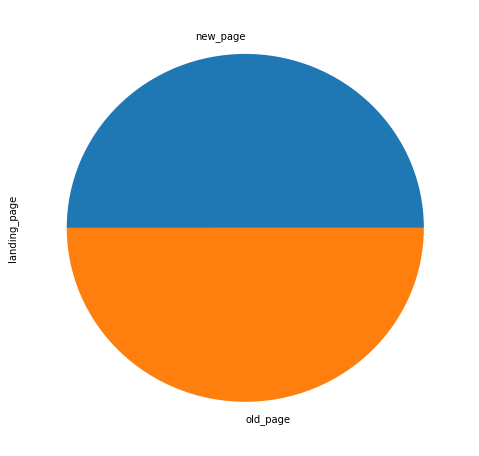

In [26]:
df2['landing_page'].value_counts().plot(kind='pie', figsize=(8,8));

In [28]:
df2['day'] = df2['timestamp'].apply(lambda x:x.split(' ')[0])

In [29]:
df2.head()

,user_id,timestamp,group,landing_page,converted,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


In [30]:
df_cr = df2.groupby(['day'])['converted'].apply(lambda g: g / g.sum()).rename("count")

In [31]:
df_cr.shape

(290584,)

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


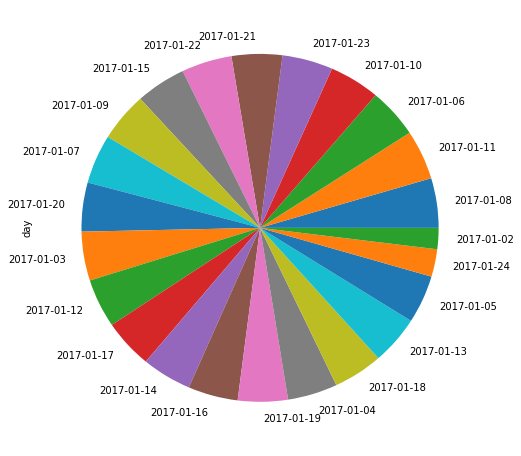

In [33]:
df2['day'].value_counts().plot(kind='pie', figsize=(8,8));

# plt.scatter(df2['day'],  df2['old_rate'], color='green',label='p_old')
# plt.scatter(df2['day'], df2['new_rate'], color='red',label='p_new')
# plt.xlabel('day of January')
# plt.ylabel('conversion rate')
# #plt.ylim(0.11, 0.13)
# plt.legend()
# plt.title('conversion rate at different days of the month');

# A/B Testing 

Null Hypothesis: Conversion(old) >= Conversion(new)

Alternative Hypothesis: Conversion(old) < Conversion(new)

Type I error. A Type I error occurs when the researcher rejects a null hypothesis when it is true. The probability of committing a Type I error is called the significance level. This probability is also called alpha, and is often denoted by α.

Type II error. A Type II error occurs when the researcher fails to reject a null hypothesis that is false. The probability of committing a Type II error is called Beta, and is often denoted by β. The probability of not committing a Type II error is called the Power of the test.

In [34]:
n_new = len(df2[df2['landing_page']=='new_page'])
n_old = len(df2[df2['landing_page']=='old_page'])

In [35]:
count_new = len(df2[(df2['landing_page']=='new_page') & (df2['converted']==1)])
nobs_new = len(df2[df2['landing_page']=='new_page'])
count_old = len(df2[(df2['landing_page']=='old_page') & (df2['converted']==1)])
nobs_old = len(df2[df2['landing_page']=='old_page'])

In [36]:
stat, pval = sm.stats.proportions_ztest([count_new,count_old], [nobs_new,nobs_old], alternative='larger')

In [37]:
pval

0.9050583127590245

In [38]:
from statsmodels.stats.power import TTestIndPower


In [39]:
effect = 0.01
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)


In [40]:
result

156978.1728602031

Since p-value = 0.905 >> alpha = 0.05, the nwe fail to reject null hypothesis, so that we will accept null hypothesis at 0.95 significance level. So the conversion rate of new version is not statistically significant larger than old version's conversion rate.